# Climate data from NCEI
**CS109A Final Project**<br>
**Predicting Food Inspection Outcomes in Chicago**<br>
Calvin J Chiew, Angelo Kastroulis, Tim Hagmann<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Data was requested from the Global Historical Climatology Network-Daily (GHCND) database hosted by the National Centers for Environmental Information (NCEI) in CSV format with the following search parameters:
- Start Date: 2010-01-01 00:00
- End Date: 2016-11-01 23:59
- Data Types: PRCP, SNWD, SNOW, TAVG, TMAX, TMIN, AWND
- Units: Standard
- Custom Flags: Station Name, Geographic Location
- Stations/Locations: Chicago, IL US (Location ID: CITY:US170006)

In [6]:
# load csv file
df_climate = pd.read_csv('climate835468.csv')

# view first few rows
df_climate.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND
0,GHCND:US1ILCK0148,OAK LAWN 1.9 SE IL US,182.3,41.6936,-87.729,20100124,0.34,-9999.0,-9999.0,-9999,-9999,-9999,-9999.0
1,GHCND:US1ILCK0148,OAK LAWN 1.9 SE IL US,182.3,41.6936,-87.729,20100308,0.10,-9999.0,-9999.0,-9999,-9999,-9999,-9999.0
2,GHCND:US1ILCK0148,OAK LAWN 1.9 SE IL US,182.3,41.6936,-87.729,20100310,0.08,-9999.0,-9999.0,-9999,-9999,-9999,-9999.0
3,GHCND:US1ILCK0148,OAK LAWN 1.9 SE IL US,182.3,41.6936,-87.729,20100311,0.03,-9999.0,-9999.0,-9999,-9999,-9999,-9999.0
4,GHCND:US1ILCK0148,OAK LAWN 1.9 SE IL US,182.3,41.6936,-87.729,20100312,0.26,-9999.0,-9999.0,-9999,-9999,-9999,-9999.0


## Temperature

It was noted in the dataset that different weather stations report different data types. The stations that reported temperature data relevant to our region of interest were:
- CHICAGO NORTHERLY ISLAND IL US (41.86611, -87.61528)
- CHICAGO OHARE INTERNATIONAL AIRPORT IL US (41.995, -87.93361)
- CHICAGO MIDWAY AIRPORT IL US (41.78611, -87.75222)

Daily maximum (TMAX) and minimum (TMIN) temperatures were reported by all 3 stations, while average temperature (TAVG) was reported at Ohare only. 

In [70]:
# format datetime string
df_climate['DATE'] =  pd.to_datetime(df_climate['DATE'], format='%Y%m%d')

# extract rows for each weather station, drop missing data
df_northerlyisland = df_climate[(df_climate['STATION_NAME'] == 'CHICAGO NORTHERLY ISLAND IL US') & (df_climate['TMAX'] != -9999) & (df_climate['TMIN'] != -9999)]
df_ohareairport = df_climate[(df_climate['STATION_NAME'] == 'CHICAGO OHARE INTERNATIONAL AIRPORT IL US') & (df_climate['TMAX'] != -9999) & (df_climate['TMIN'] != -9999) & (df_climate['TAVG'] != -9999)]
df_midwayairport = df_climate[(df_climate['STATION_NAME'] == 'CHICAGO MIDWAY AIRPORT IL US') & (df_climate['TMAX'] != -9999) & (df_climate['TMIN'] != -9999)]

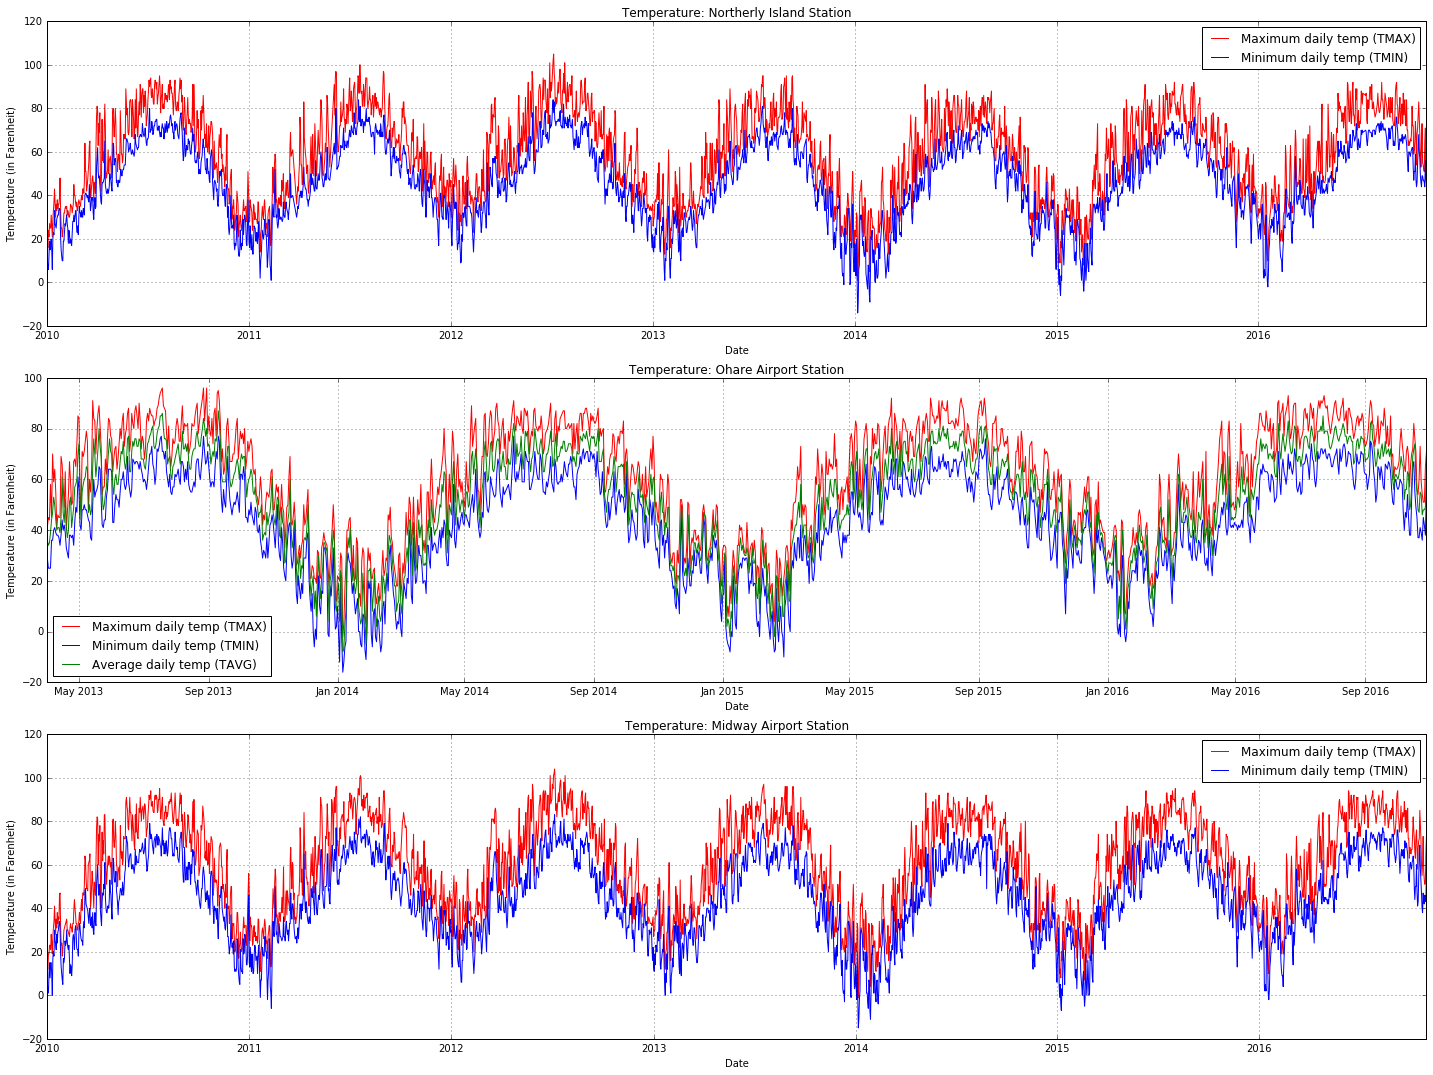

In [71]:
# plot temperature graphs
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize=(20, 15))

ax1.plot(df_northerlyisland['DATE'], df_northerlyisland['TMAX'], c='r', label='Maximum daily temp (TMAX)')
ax1.plot(df_northerlyisland['DATE'], df_northerlyisland['TMIN'], c='b', label='Minimum daily temp (TMIN)')
ax1.set_title('Temperature: Northerly Island Station')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (in Farenheit)')
ax1.legend(loc='best')
ax1.grid()

ax2.plot(df_ohareairport['DATE'], df_ohareairport['TMAX'], c='r', label='Maximum daily temp (TMAX)')
ax2.plot(df_ohareairport['DATE'], df_ohareairport['TMIN'], c='b', label='Minimum daily temp (TMIN)')
ax2.plot(df_ohareairport['DATE'], df_ohareairport['TAVG'], c='g', label='Average daily temp (TAVG)')
ax2.set_title('Temperature: Ohare Airport Station')
ax2.set_xlabel('Date')
ax2.set_ylabel('Temperature (in Farenheit)')
ax2.legend(loc='best')
ax2.grid()

ax3.plot(df_midwayairport['DATE'], df_midwayairport['TMAX'], c='r', label='Maximum daily temp (TMAX)')
ax3.plot(df_midwayairport['DATE'], df_midwayairport['TMIN'], c='b', label='Minimum daily temp (TMIN)')
ax3.set_title('Temperature: Midway Airport Station')
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature (in Farenheit)')
ax3.legend(loc='best')
ax3.grid()

plt.tight_layout()
plt.show()

In general, the max/min/avg temperatures follow a cyclical trend every year, increasing during the summer months and decreasing in the winter months as expected. 

---

## Wind

Average wind speed was recorded at Ohare Airport station only. We will consider pulling data on 24 hour total wind movement as well.

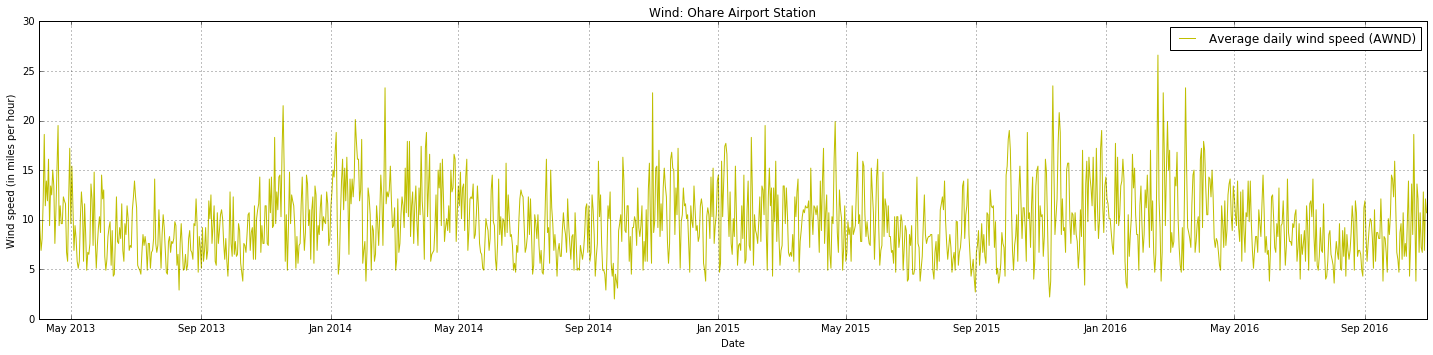

In [74]:
# plot wind graph
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

ax.plot(df_ohareairport['DATE'], df_ohareairport['AWND'], c='y', label='Average daily wind speed (AWND)')
ax.set_title('Wind: Ohare Airport Station')
ax.set_xlabel('Date')
ax.set_ylabel('Wind speed (in miles per hour)')
ax.legend(loc='best')
ax.grid()

plt.tight_layout()
plt.show()

Average wind speed is generally between 5-15 miles per hour throughout the entire time period.

---

## Precipitation

There are many weather stations scattered throughout the city of Chicago measuring rainfall, including:
- CHICAGO 2.7 WNW IL US
- CHICAGO 3.0 N IL US
- CHICAGO 3.0 NW IL US
- BOOT CAMP CHICAGO 4.2 SW IL US
- CHICAGO 4.7 NE IL US
- CHICAGO 4.8 NNW IL US
- CHICAGO 5.5 ESE IL US
- CHICAGO 6.4 NNE IL US
- CHICAGO 6.5 NNE IL US
- CHICAGO 6.8 NNE IL US

<p>Here, we randomly select 2 stations to present and visualize. In our analysis later, we will map food establishments to their nearest station with rainfall data.

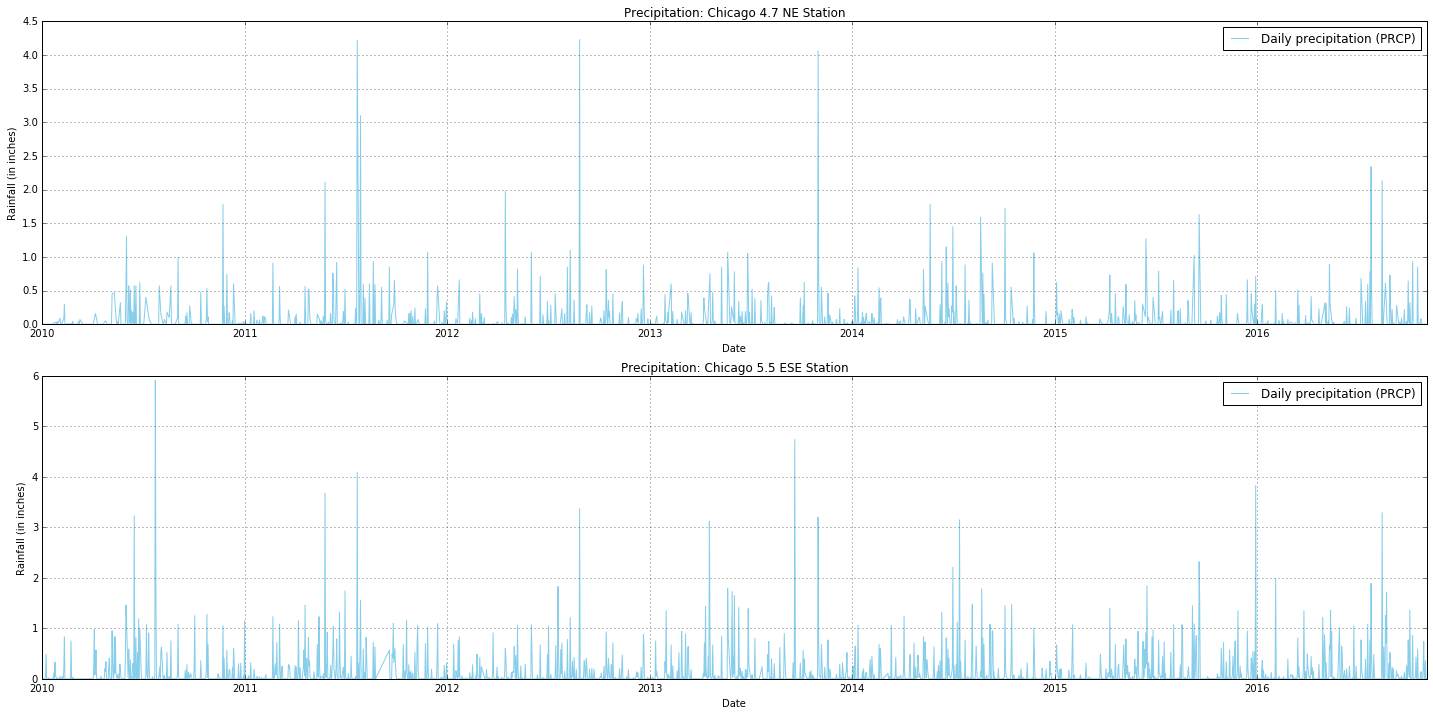

In [95]:
# extract rows for each weather station, drop missing data
df_chicago47 = df_climate[(df_climate['STATION_NAME'] == 'CHICAGO 4.7 NE IL US') & (df_climate['PRCP'] != -9999)]
df_chicago55 = df_climate[(df_climate['STATION_NAME'] == 'CHICAGO 5.5 ESE IL US') & (df_climate['PRCP'] != -9999)]

# plot rainfall graphs
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(20, 10))

ax1.plot(df_chicago47['DATE'], df_chicago47['PRCP'], c='skyblue', label='Daily precipitation (PRCP)')
ax1.set_title('Precipitation: Chicago 4.7 NE Station')
ax1.set_xlabel('Date')
ax1.set_ylabel('Rainfall (in inches)')
ax1.legend(loc='best')
ax1.grid()

ax2.plot(df_chicago55['DATE'], df_chicago55['PRCP'], c='skyblue', label='Daily precipitation (PRCP)')
ax2.set_title('Precipitation: Chicago 5.5 ESE Station')
ax2.set_xlabel('Date')
ax2.set_ylabel('Rainfall (in inches)')
ax2.legend(loc='best')
ax2.grid()

plt.tight_layout()
plt.show()

Based on these 2 stations, precipitation is generally between 0-1 inch throughout the entire time period with a few occasional spikes.

---

## Snow

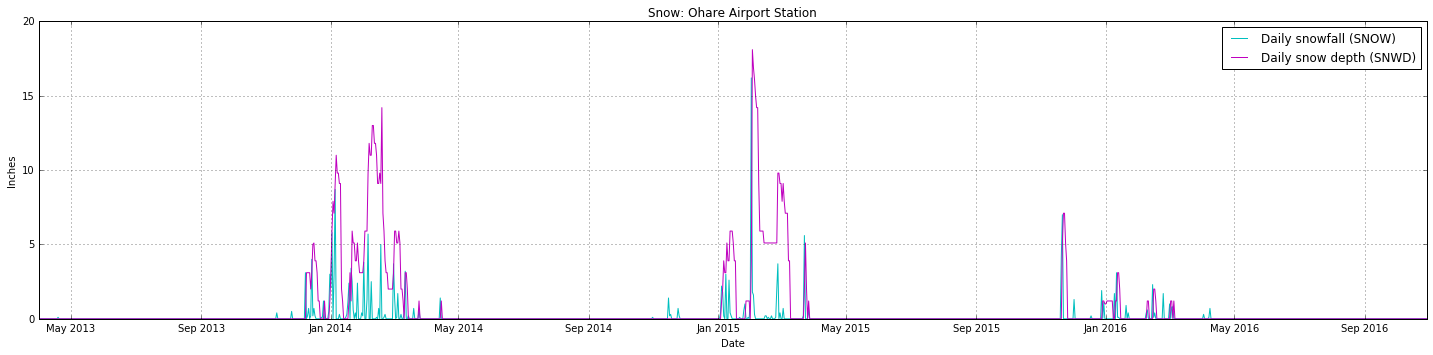

In [83]:
# plot snow graphs
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

ax.plot(df_ohareairport['DATE'], df_ohareairport['SNOW'], c='c', label='Daily snowfall (SNOW)')
ax.plot(df_ohareairport['DATE'], df_ohareairport['SNWD'], c='m', label='Daily snow depth (SNWD)')
ax.set_title('Snow: Ohare Airport Station')
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.legend(loc='best')
ax.grid()

plt.tight_layout()
plt.show()

There was longer and greater snowfall and snow depth in the winters of 2014 and 2015 than in 2016.

---

## Relationship between climate features and food inspection outcomes

From exploration of the food inspection dataset, we note that failure rates tend to increase in the warmer mid-year months corresponding to summer and early fall. High temperature appears to be associated with failed outcome and will be explored further in model building.  